## Week 4: The Age Distribution of Cancer Incidence -
## Continuous Distributions Based on the Poisson Process

Kyle P. Rasku

References:

Belikov, A. V., Vyatkin, A., & Leonov, S. V. (2021). The Erlang distribution approximates the age distribution of incidence of childhood and young adulthood cancers. PeerJ, 9, e11976. https://doi.org/10.7717/peerj.11976

Date, S. (2020, April 4). Generalized Poisson Regression for Real World Datasets, and a step by step tutorial for doing Generalized Poisson regression in Python.  "Towards Data Science", *Medium.com*.  https://towardsdatascience.com/generalized-poisson-regression-for-real-world-datasets-d1ff32607d79

Maslov, S. & Jensen, P. (2017).  BIOE-582, Statistics and Algorithms in Genomic Biology; Lecture 11: Poisson Process Continuous Probability Distributions [PPT Slides]. Department of Bioengineering, University of Illinois at Urbana-Champaign. https://courses.engr.illinois.edu/bioe582/fa2017/Lecture_11_Poisson_Process_Exponential_Erlang_Gamma_Distributions.pdf

Riffenburgh & Gillen (2020).  Statistics in Medicine, Fourth Edition; Elsevier Inc.

### The Poisson Distribution

When modeling positive counts where the likelihood of an event is small, there are many opportunities for an event to occur, but a small chance of occurrence at any one time.

Imagine many people walking by the window of an expensive shop.  There are many opportunities for someone to enter the shop, but only a very small chance of someone actually going in to purchase.  This is something you can witness first hand, if you take a walk down 5th Avenue in New York City.  

Strictly speaking, in a Poisson distribution, the **mean should equal the variance**.  Often enough, with real-world data, this isn't the case.

When we define a Poisson regression model later in the course we'll be looking at x variables that might be related to / correlated with a Poisson - or close-to-Poisson distributed y (outcome) variable.

### Dispersion

Where the variance of y conditional on the x variables is not equal to the mean of y conditional on the x variables, the variance is usually either greater than the mean (demonstrating over-dispersion) or less than the mean (demonstrating under-dispersion).

Most real-world data is not equally dispersed. But, given this, a model that tries to obey the proscribed variability (mean = variance) for a typical Poisson-distributed y will generate predictions of poor quality.  

The fix for this is to make variance = f(mean), or a function of the mean. This is generally expressed as:

Variance = mean + α * mean^p where p can be = 0 (this results in a typical Poisson with variance = mean), 1, 2 (these result in forms of the **Negative Binomial (NB) distribution**), etc.

α is known as the **dispersion parameter**, representing the additional variability in y not explained by the independent variables in the model (x).

#### The Negative Binomial Model
The Negative Binomial regression model (which can be referred to as a 'Poisson-Gamma mixture') is often a good model for real-world count data.

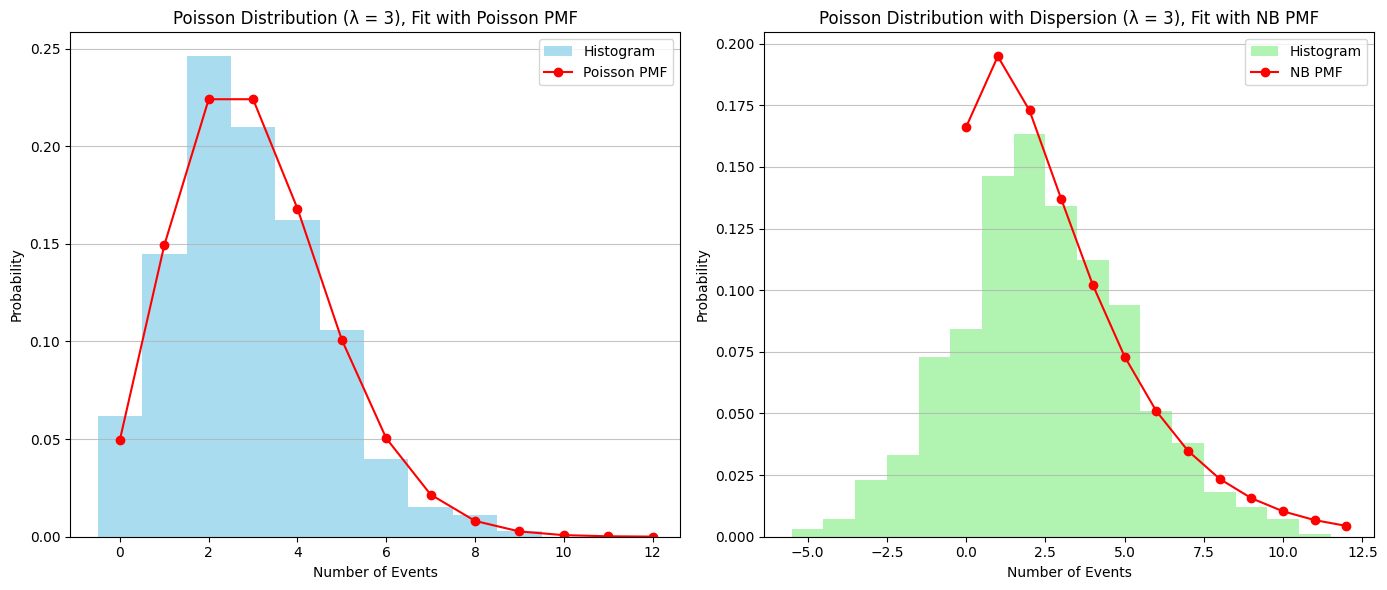

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom

# Parameters for the Poisson distributions
lambda_poisson = 3
dispersion_factor = 2  # Factor to add dispersion

# Generate random samples for Poisson with and without dispersion
poisson_samples = poisson.rvs(lambda_poisson, size=1000)
poisson_dispersion_samples = poisson.rvs(lambda_poisson, size=1000) + np.random.normal(0, dispersion_factor, 1000)

# Calculate the Poisson PMF for the range of observed values
x_poisson = np.arange(0, max(max(poisson_samples), max(poisson_dispersion_samples)) + 1)
pmf_poisson = poisson.pmf(x_poisson, lambda_poisson)

# Fit a Negative Binomial distribution to the samples with dispersion
mean_disp = np.mean(poisson_dispersion_samples)
var_disp = np.var(poisson_dispersion_samples)
r_nbinom_fit = mean_disp**2 / (var_disp - mean_disp)
p_nbinom_fit = r_nbinom_fit / (r_nbinom_fit + mean_disp)

# Calculate the Negative Binomial PMF for the range of observed values
x_poisson2 = np.arange(0, max(poisson_dispersion_samples) + 1)
pmf_nbinom_fit = nbinom.pmf(x_poisson2, r_nbinom_fit, p_nbinom_fit)

# Plotting with Poisson model fit
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Poisson distribution without dispersion
axs[0].hist(poisson_samples, bins=range(0, max(poisson_samples)+2), density=True, color='skyblue', alpha=0.7, align='left', label='Histogram')
axs[0].plot(x_poisson, pmf_poisson, 'ro-', label='Poisson PMF')
axs[0].set_title('Poisson Distribution (λ = 3), Fit with Poisson PMF')
axs[0].set_xlabel('Number of Events')
axs[0].set_ylabel('Probability')
axs[0].grid(axis='y', alpha=0.75)
axs[0].legend()

# Poisson distribution with dispersion
axs[1].hist(poisson_dispersion_samples, bins=range(int(min(poisson_dispersion_samples)), int(max(poisson_dispersion_samples))+2), density=True, color='lightgreen', alpha=0.7, align='left', label='Histogram')
axs[1].plot(x_poisson2, pmf_nbinom_fit, 'ro-', label='NB PMF')
axs[1].set_title('Poisson Distribution with Dispersion (λ = 3), Fit with NB PMF')
axs[1].set_xlabel('Number of Events')
axs[1].set_ylabel('Probability')
axs[1].grid(axis='y', alpha=0.75)
axs[1].legend()


plt.tight_layout()
plt.show()

### Continuous Probability Distributions: Exponential, Erlang & Gamma

#### **Related: The Poisson Process**

In medicine, the rate of occurrences of an event over a known period of observation is an important measurement.  We might want to know how often people have an accident, or visit the physician's office.  Or how frequently infections occur post-operatively, or due to vascular access or catheter-associated UTIs.

A series of discrete events happen over a period of time (t), at a rate defined - in Poisson-related distributions - by the variable lambda (λ).  The *actual* # of events (Nx) is a Poisson-distributed discrete random variable with mean = λx:

PN(Nx=n)=exp(-λx)(λx)n/n!     E(Nx)= λx

#### Some Math: **Why a Discrete Poisson Distribution?**  

- First, divide time into many tiny intervals of length x(0) << 1/λ
- The probability of an event per each tiny interval is small: p = λ∙Δx << 1,
- While the number of intervals is large: L= x/ Δx >> 1,
- And the mean remains constant: E(Nx)=p ∙ L= (λΔx) ∙(x/Δx) = λ∙x
- P(Nx=n)=L!/n!(L-n)! p^n (1-p)^L-n
- In the limit p -> 0, L -> ∞: Binomial distribution -> Poisson

#### **What is the distribution of the interval between consecutive events of a constant rate (Poisson) process?**

A **continuous exponential distribution** results when the interval between events is a **continuous random variable**.

#### **The mean and variance of the Exponential and Poisson distributions**

If the interval (X) has an exponential distribution with parameter λ:

- mean = E(X) = 1/λ
- variance = V(X) = 1/λ^2

As discussed above, for the **Poisson** distribution, mean should be equal to variance. Where mean is not equal to variance, the alpha parameter is used to deal with over-dispersion or under-dispersion.

For the **Exponential** distribution, mean = standard deviation.

The Exponential distribution and its variants are used in a variety of real-life models, including:

- The probability of medical device failure
- Wait time predictions

#### **Exponential Variants: the Erlang & Gamma distributions**

##### *The Erlang Distribution*
The Erlang distribution is a generalization of the Exponential distribution where the Exponential distribution models the continuous time interval up to the occurrence of the 1st event, and the Erlang distribution models the continuous time interval to the nth event - a sum of n exponentially-distributed variables!

The Erlang distribution is a **continuous generalization** of the discrete Negative Binomial distribution.

###### *The Gamma Distribution*
The gamma function is the generalization of the factorial function for n > 0, not just non-negative integers.

Γ(n) = ∫0->∞ x^n-1 . e^-x dx for n > 0

###### *Properties of the Gamma Distribution:*
- Recursive property: Γ(n) = (n-1) . Γ(n-1)
- Factorial function: Γ(n) = (n-1)!
- Therefore: Γ(1) = 0! = 1

(1) For more on Cumulative Distribution Functions: https://statisticsbyjim.com/graphs/empirical-cumulative-distribution-function-cdf-plots/

(2) For more on the Probability Density Function: https://statisticsbyjim.com/probability/probability-density-function/

### Example: Adding Two Exponential Distributions to Achieve an Erlang Distribution

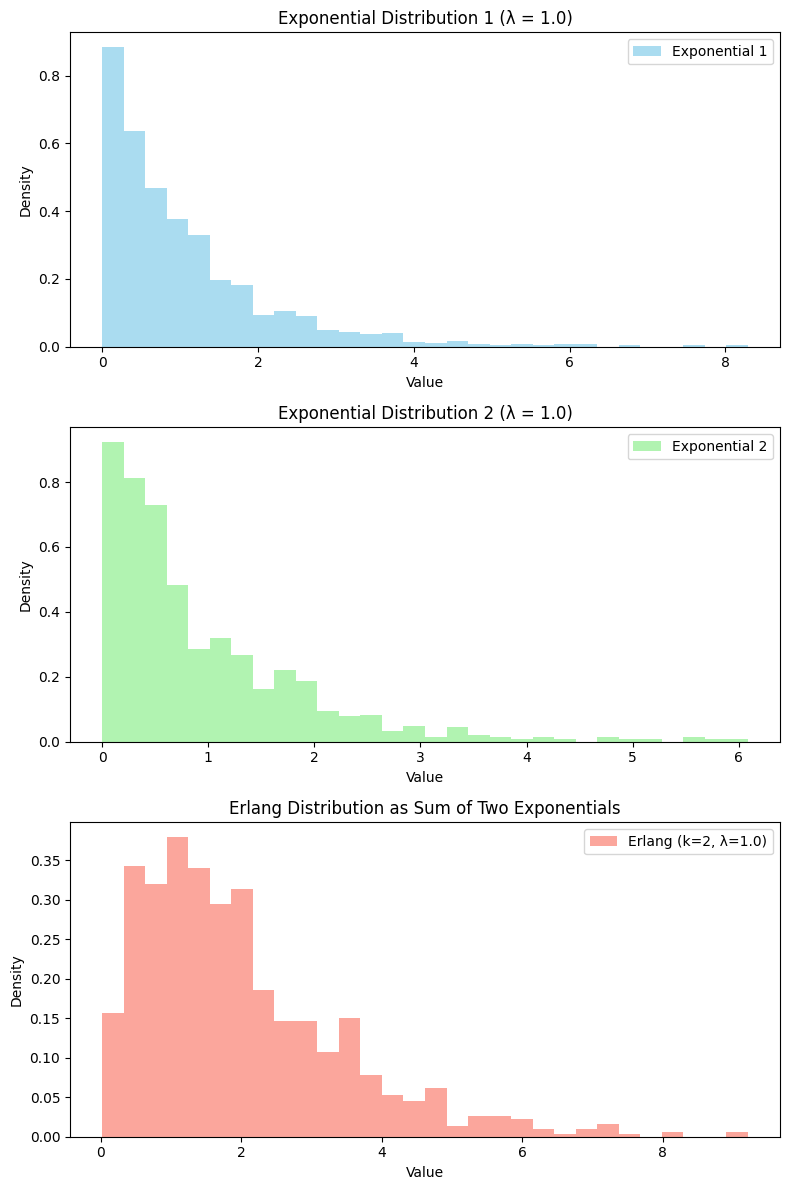

In [ ]:
# Define parameters for the exponential distributions
lambda_exp1 = 1.0
lambda_exp2 = 1.0

# Define the shape parameter for the Erlang distribution (sum of two exponential stages)
k_erlang = 2

# Generate random samples for the exponential distributions
exp_samples1 = np.random.exponential(1 / lambda_exp1, size=1000)
exp_samples2 = np.random.exponential(1 / lambda_exp2, size=1000)

# Sum the two sets of exponential samples to get Erlang samples
erlang_samples = exp_samples1 + exp_samples2

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot Exponential Distribution 1
axs[0].hist(exp_samples1, bins=30, density=True, color='skyblue', alpha=0.7, label='Exponential 1')
axs[0].set_title('Exponential Distribution 1 (λ = 1.0)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
axs[0].legend()

# Plot Exponential Distribution 2
axs[1].hist(exp_samples2, bins=30, density=True, color='lightgreen', alpha=0.7, label='Exponential 2')
axs[1].set_title('Exponential Distribution 2 (λ = 1.0)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')
axs[1].legend()

# Plot Sum as Erlang Distribution
axs[2].hist(erlang_samples, bins=30, density=True, color='salmon', alpha=0.7, label='Erlang (k=2, λ=1.0)')
axs[2].set_title('Erlang Distribution as Sum of Two Exponentials')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')
axs[2].legend()

plt.tight_layout()
plt.show()

### Gamma, Erlang, Exponential & Poisson

To summarize, we can say that the Poisson distribution is used to model the probability of a specific number of events occurring within a fixed time interval.

The exponential distribution is for modeling the wait time until a *first* event.

The gamma and erlang distributions? For modeling the wait time until the *k-th* event (Gamma), or events (Erlang).

So, if we would use either a Poisson or Negative Binomial model to predict the # of customers who will buy something today, we would use an Exponential model to predict the *amount of time before the first customer buys*, and a Gamma model to predict the *amount of time before the k-th customer buys*.  If there are many buying stages, where the k-th customer must buy multiple times, we could model this using the Erlang distribution.

In healthcare, the Gamma distribution is often useful for:

- Cost modeling (avg. dollars spent per beneficiary)
- Modeling the length of stay
- Modeling absenteeism
- Modeling wait times to procedure / operation
- Modeling wait times to discharge
- Modeling the time to disease

And the Erlang distribution is useful for modeling several stages of a process - for instance, disease states or stages - where each one can be represented by an Exponential or Gamma distribution.

### Parameters

The Gamma and Erlang distributions have three parameters: the shape (k or a > 0), the scale (theta or θ), and the rate (beta or β) which is equal to 1/θ.

### How do I know which distribution will fit my data?

We can't know the distribution of data just by looking at it, but we can think about the process that created the data.  Does it fit one of the scenarios we discussed?

Is it count data? It might be Binomial, Poisson, or Negative Binomially distributed.  
Is it about a process where there's an unknown amount of time before something happens?  Or about a process where there's an unknown amount of time before n things happen?  
Can the process be divided into stages where we're not sure when each stage will take place?
Is it generated by a random (or seemingly random) process?

We might often believe some data is normally distributed (or close enough) by looking at a histogram, but we could be wrong!  That's the reason for Tests of Normality*.  It is best to **test** the distribution of the outcome variable (unless of course it is binary, then we know the outcome distribution is Binomial).

*More on Tests of Normality:

https://statisticsbyjim.com/basics/assessing-normality-histograms-probability-plots/

https://journals.tubitak.gov.tr/medical/vol36/iss3/7/

Riffenburgh & Gillen, Ch.13 p.321-336

## Belikov, Vyatkin, & Leonov: The Erlang distribution approximates the age distribution of incidence of childhood and young adulthood cancers

In their August 6, 2021 publication, three scientists from the Laboratory of Innovative Medicine, School of Biological and Medical Physics, Moscow Institute of Physics and Technology, Moscow, Russia, used the CDC WONDER data to show that the Erlang distribution is the only classical probability distribution that can adequately model the age distribution of incidence for all
studied childhood and young adulthood cancers, in addition to cancers of old age.

To determine this, Belikov & Vyatkin created python code that tested the data for conformance to many distributions.  In their documentation, they state that it took 6 hours for this distribution-fitting code to run on a typical CPU!

https://pubmed.ncbi.nlm.nih.gov/34434669/

https://github.com/belikov-av/childhoodcancers

Although it took Belikov & Vyatkin's code 6 hours to prove that cancer incidence was an appropriate distribution for modeling pediatric cancer incidence, it could be an intuitive direction to go in.  The use of the Erlang distribution to model the incidence of cancers could be thought about in the context of the multistage theory of carcinogenesis, which suggests that cancer development involves a series of independent stages, where each represents a different set of biological processes, such as mutations or other changes at the cellular level, that contribute to cancer development.  

In this framework, the time to progress through each stage is uncertain, and could be modeled as an Exponential distribution. Therefore, the total time to develop cancer, which is the sum of the times for all stages, could be modeled using an Erlang distribution, since the Erlang distribution is a sum of independent Exponential distributions.

In [ ]:
import pandas as pd
import requests
from io import BytesIO

# URL of the Box shared link
shared_link = 'https://ucdavis.box.com/s/7e3vgk1nfxft67t9fnsi50d6bj2exa5c'

# Modify the link to point to the direct download endpoint
direct_link = shared_link.replace('https://ucdavis.box.com/s/', 'https://ucdavis.box.com/shared/static/') + '.xlsx'

# Use requests to download the file
response = requests.get(direct_link)

# Load the response content into a BytesIO object and then into a Pandas DataFrame
cancer_ds = pd.read_excel(BytesIO(response.content), engine="openpyxl")

cancer_ds.columns = ['Age', 'EwingTumor', 'ExtracranialGermCell1', 'ExtracranialGermCell2', 'Hepatoblastoma', 'IntracranialEmbroyonal', 'IntracranialGermCell', 'MalignantGonadalGermCell', 'Nephroblastoma', 'Neuroblastoma', 'Retinoblastoma']
pd.set_option('display.max_columns', None)  # Display all columns

# Display the DataFrame
cancer_ds.head()

,Age,EwingTumor,ExtracranialGermCell1,ExtracranialGermCell2,Hepatoblastoma,IntracranialEmbroyonal,IntracranialGermCell,MalignantGonadalGermCell,Nephroblastoma,Neuroblastoma,Retinoblastoma
0,0.5,0.29000,12.64000,NaN,10.79,11.19000,NaN,NaN,16.07000,58.49000,28.38000
1,3.0,0.98000,1.48999,NaN,4.88,10.83008,0.25000,NaN,19.91992,21.47021,8.57996
2,7.5,2.16998,0.13000,0.13000,0.33,7.47998,1.10001,1.08,5.09998,3.46997,0.47000
3,12.5,4.25000,NaN,0.33000,0.18,4.23999,2.52002,3.62,0.70000,1.04999,NaN
4,17.5,4.29004,NaN,1.70999,NaN,2.86999,2.28998,21.53,0.35000,0.41000,NaN


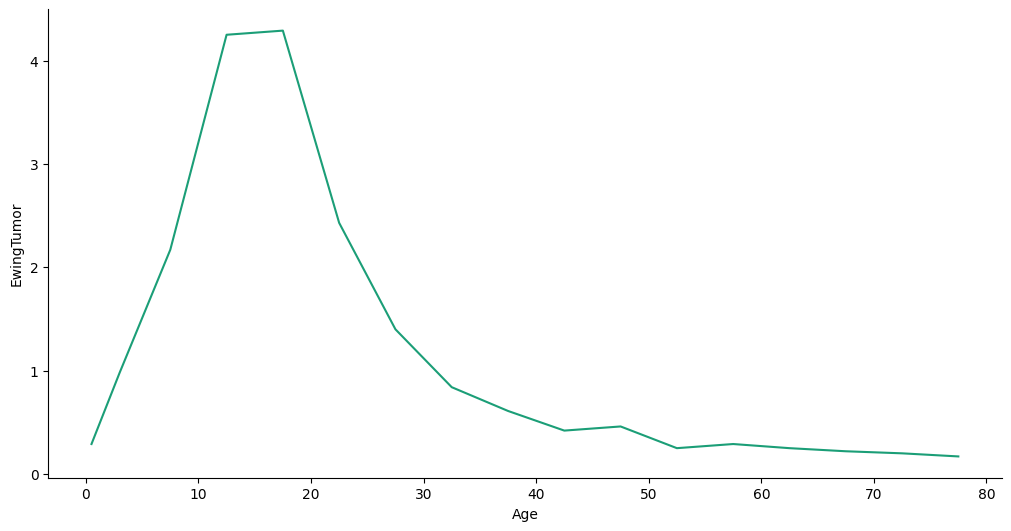

In [ ]:
# @title Age, years vs Ewing tumor

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Age']
  ys = series['EwingTumor']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cancer_ds.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('EwingTumor')

Fitted Erlang Distribution Over Age, Years vs. Ewing Tumor

Using the k and theta values from the paper: 4.3 & 4.25

The plot is scaled so the distribution curve will align with the data's original y-values.

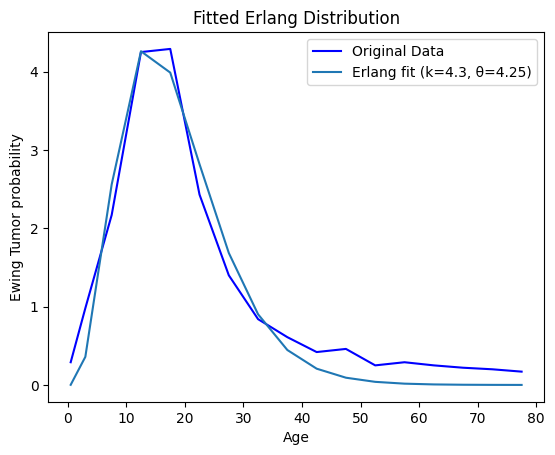

In [ ]:
from scipy.stats import gamma
import numpy as np
from matplotlib import pyplot as plt

x_values = cancer_ds['Age']
y_values = cancer_ds['EwingTumor']

y_values_clean = y_values[np.isfinite(y_values)]
x_values_clean = x_values[np.isfinite(y_values)]

k = 4.3  # Shape parameter (k=1 for Erlang is an exponential distribution)
theta = 4.25  # Scale parameter

# Now we generate y-values for the Erlang distribution
# Since k=1, this is essentially an exponential distribution
y_erlang = gamma.pdf(x_values_clean, a=k, scale=theta)

# Plot the original data
plt.plot(x_values_clean, y_values_clean, 'b-', label='Original Data')

# Overlay the fitted Erlang distribution
plt.plot(x_values_clean, y_erlang*np.mean(x_values_clean)*2.29, label=f'Erlang fit (k={k}, θ={theta})')

# Adjust the plot as needed
plt.title('Fitted Erlang Distribution')
plt.xlabel('Age')
plt.ylabel('Ewing Tumor probability')
plt.legend()
plt.show()